#**CLUSTERING**

In this Lab you will have write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model

You will then have to use these algorithms on a pratical dataset and compare the results with the inbuilt algorithms present in scikit learn toolkit

**Please use plots wherever possible to demonstrate the results**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

(400,)


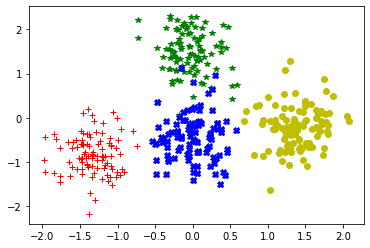

In [2]:
# write your code here

mu1=np.array([0.5,0])
mu2=np.array([5,5])
mu3=np.array([5,1])
mu4=np.array([10,1.5])

# mu1=np.array([0.5,0])
# mu2=np.array([5,2.5])
# mu3=np.array([5,1])
# mu4=np.array([10,1.5])




Sigma1=np.array([[1,0.9],[0.9,1]])
Sigma=np.array([[1,0],[0,1]])
f1=np.random.multivariate_normal(mu1,Sigma,100)
f2=np.random.multivariate_normal(mu2,Sigma,100)
f3=np.random.multivariate_normal(mu3,Sigma,100)
f4=np.random.multivariate_normal(mu4,Sigma,100)
F=np.concatenate((f1,f2,f3,f4))

F=(F-(np.mean(F,axis=0)))/(np.std(F,axis=0)) # data normalization
data=F

#Plotting
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']

lab1=np.zeros(f1.shape[0])
lab2=np.ones(f2.shape[0])
lab3=np.tile([2],f3.shape[0])
lab4=np.tile([3],f4.shape[0])
lab=np.concatenate((lab1,lab2,lab3,lab4))
print(lab.shape)

plt.figure()
for l in range(4):
    id=np.where(lab==l)
    
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])

**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

[[ 1.27046433 -0.59778508]
 [-0.03393037  1.43731806]
 [-1.96326769 -0.43886779]
 [-1.97750024 -0.94419187]]


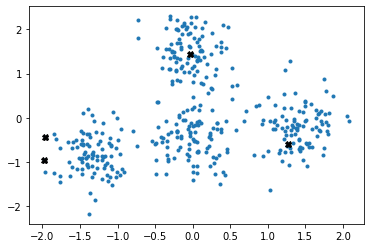

In [3]:
# write your code here

K=4  # no of clusters
KMI=20  # no of iterations

# random initialization of clusters
idx=np.random.randint(0,F.shape[0],K)
Cents=F[idx,:]
print(Cents)

# initialized a array to store distance, assigned label, minimum distance
DAL=np.zeros((F.shape[0],K+2))



plt.figure()
plt.plot(F[:,0],F[:,1],'.')
plt.plot(Cents[:,0],Cents[:,1],'X',color='k')


**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||_{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||_{2}$$

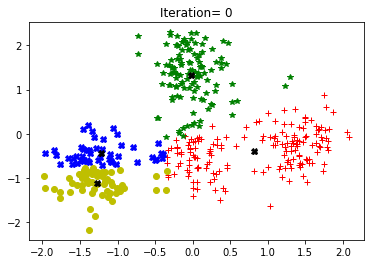

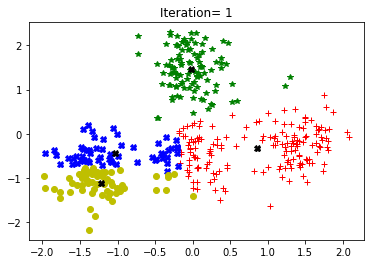

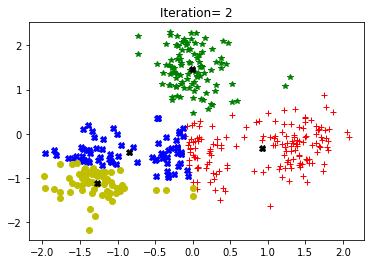

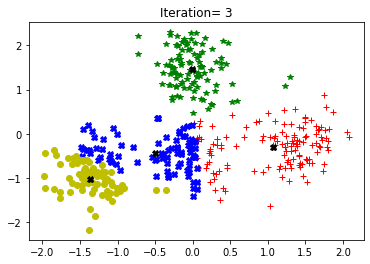

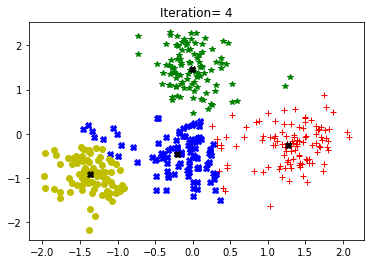

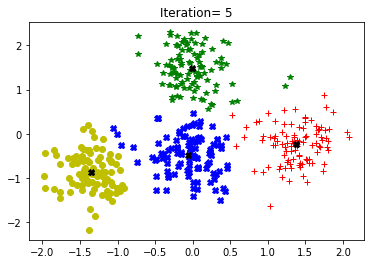

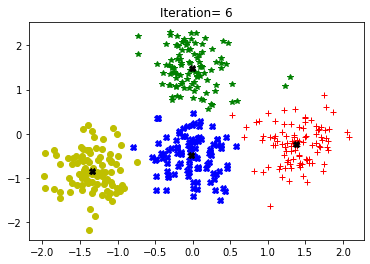

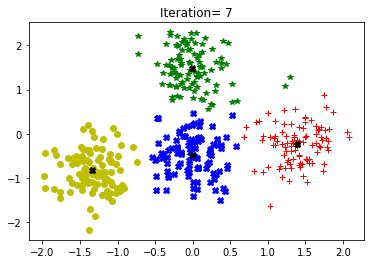

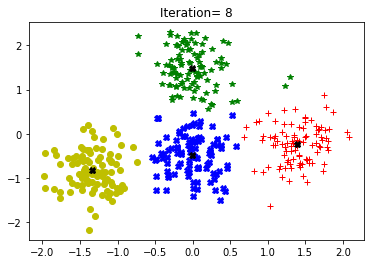

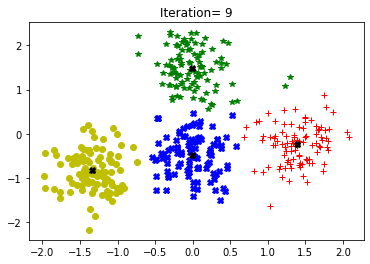

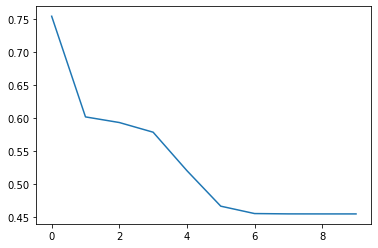

In [4]:
# write your code here

error=[]
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


for n in range(KMI):
# assignment stage
  for i in range(F.shape[0]):
    for j in range(K):
      DAL[i,j]=np.linalg.norm(F[i,:]-Cents[j,:])

    Dist=np.min(DAL[i,:K])
    ind=int((np.where(Dist==DAL[i,:K])[0]))
    DAL[i,K]=ind
    DAL[i,K+1]=Dist

# re-estimation stage
  for i in range(K):
    ind=np.where(DAL[:,K]==i)
    Cents[i,:]=np.mean(F[ind,:][0],axis=0)

  error.append(np.mean(DAL[:,K+1]))  
  # print(Cents)

# for ploting 
  plt.figure()
  for l in range(K):
    id=np.where(DAL[:,K]==l)
    plt.plot(F[id,0],F[id,1],'.',color=clr[l],marker=mrk[l])
  plt.plot(Cents[:,0],Cents[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
   if abs(error[n]-error[n-1])<eps:
    break




# plot the error curve
plt.figure()
plt.plot(error)

**Step 4 : Calculate the accuracy**

In [5]:
# write your code here
# performance measure
# homogeneity: each cluster contains only members of a single class.
# referance: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

from sklearn import metrics

pred_lab=DAL[:,K]
print(pred_lab)
print(lab)
print('Performance=',metrics.homogeneity_score(pred_lab,lab))

[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

(400,)


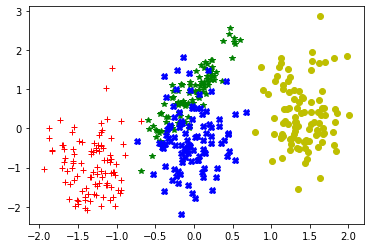

In [6]:
# write your code here

import numpy as np
import matplotlib.pyplot as plt

## Data generation

# mu1=np.array([0.5,0])
# mu2=np.array([5,5])
# mu3=np.array([5,1])
# mu4=np.array([10,1.5])

mu1=np.array([0.5,0])
mu2=np.array([5,2.5])# mu2=5,5
mu3=np.array([5,1])
mu4=np.array([10,1.5])





Sigma=np.array([[1,0],[0,1]])
Sigma1=np.array([[1,0.9],[0.9,1]])
f1=np.random.multivariate_normal(mu1,Sigma,100)
f2=np.random.multivariate_normal(mu2,Sigma1,100)# change it to sigma
f3=np.random.multivariate_normal(mu3,Sigma,100)
f4=np.random.multivariate_normal(mu4,Sigma,100)
F=np.concatenate((f1,f2,f3,f4))

data=(F-(np.mean(F,axis=0)))/(np.std(F,axis=0)) # data normalization


# ploting
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']

lab1=np.zeros(f1.shape[0])
lab2=np.ones(f2.shape[0])
lab3=np.tile([2],f3.shape[0])
lab4=np.tile([3],f4.shape[0])
lab=np.concatenate((lab1,lab2,lab3,lab4))
print(lab.shape)

plt.figure()
for l in range(4):
    id=np.where(lab==l)
    #print(l)
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])



**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Coveriance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [7]:
def initialization(data,K):

  # write your code here
  d=data.shape[1] # dimension of data


# mean initialization
  pick_means=np.random.randint(0,data.shape[0],K)
  means=data[pick_means,:]
  means=np.transpose(means)

# covariance matrix initialization
  Covariance=np.zeros((d,d,K))
  for i in range(K):
    Covariance[:,:,i]=np.eye(d)*np.max(data,axis=None)    
    
#mixing coefficients
  proportions=np.ones((K,1))/K

  theta=[means,Covariance,proportions]

  Cents=means.T
    
  return theta

**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\Phi_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})}$$

where,
$$\Phi_{k}=\{\mu_{k},\Sigma_{k}\}$$
$$\theta_{k}=\{\Phi_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\Phi_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [8]:
# E-Step GMM
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):

    # write your code here
    means=theta[0]
    Covariance=theta[1]
    proportions=theta[2]
    #Computing responsibility coefficients of each point for each cluster.
    responsibility=np.zeros((len(data),K))
    for i in range(K):
        itr=0   # increase w.r.t datapoint 
        for x in data:
            normalising=0
# Compute probability of xj for cluster i 
            N_xn=multivariate_normal.pdf(x,mean=means[:,i], cov=Covariance[:,:,i])
            # # only to avoid 
            # if N_xn<10**(-20):
            #   N_xn=10**(-20)


            responsibility[itr][i]=proportions[i]*N_xn

            for j in range(K):
                normalising+=proportions[j]*(multivariate_normal.pdf(x,mean=means[:,j], cov=Covariance[:,:,j])+10**(-20))
            responsibility[itr][i]=responsibility[itr][i]/normalising
            itr+=1

    return responsibility

**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [9]:
# M-STEP GMM

def M_Step_GMM(data,responsibility):
    
    # write your code here
    [N,K]=np.shape(responsibility) #N is number of data points
    d=data.shape[1]
    
    #Compute Proportions
    Nk=np.sum(responsibility,axis=0)
    proportions=Nk/N
        
    #Compute Means
    means=np.zeros((K,d))        
    for k in range(K):
        temp1=data
        temp2=responsibility[:,k]
        temp=temp1*temp2[:,None] #multiplying a vector with multiple columns
        means[k]=(1/Nk[k])*np.sum(temp,axis=0)  
    means=np.transpose(means)
        
    #Compute Covariance
    Covariance=np.zeros((d,d,K))        
    for k in range(K):
        for n in range(N):
            temp1=data[n,:]-means[:,k]
            temp2=np.outer(temp1,np.transpose(temp1)) # vector outer product
            temp=responsibility[n,k]*temp2
            Covariance[:,:,k]+=temp
        Covariance[:,:,k]=(1/Nk[k])*Covariance[:,:,k]
    
    theta=[means,Covariance,proportions]
    Likelihood=0
    log_likelihood=0
    for n in range(N):
        for k in range(K):
            Likelihood+=proportions[k]*(multivariate_normal.pdf(data[n,:],mean=means[:,k], cov=Covariance[:,:,k]))
        log_likelihood+=np.log(Likelihood)
           
    return theta, log_likelihood

**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

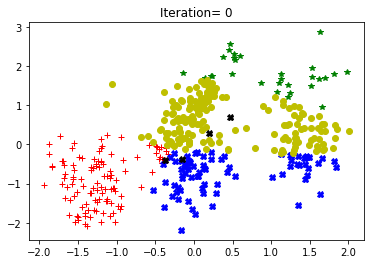

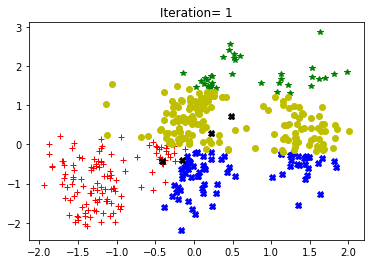

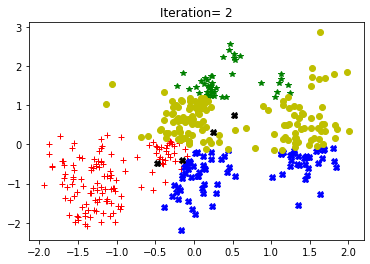

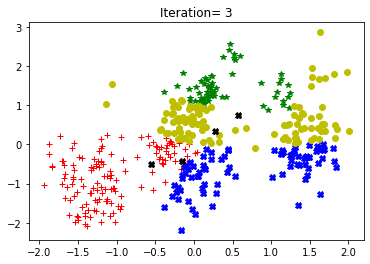

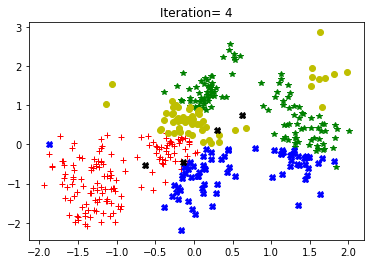

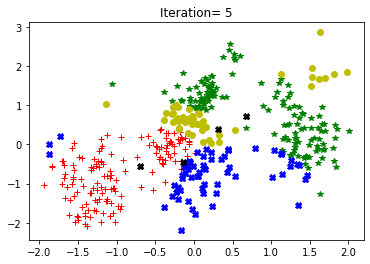

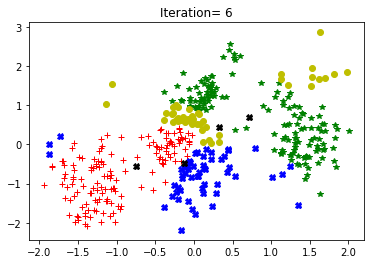

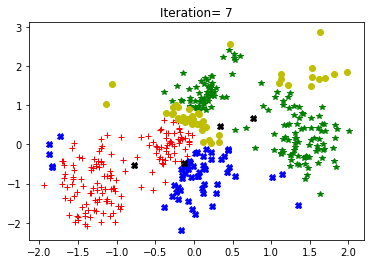

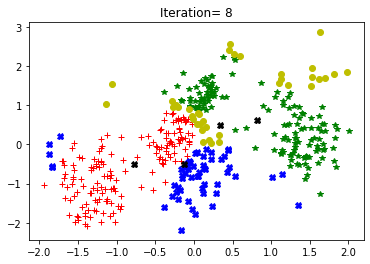

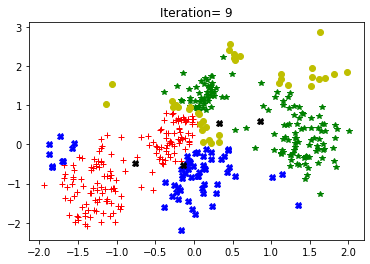

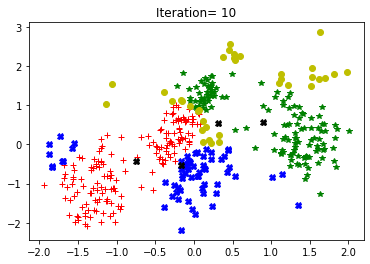

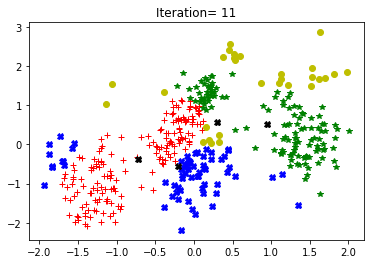

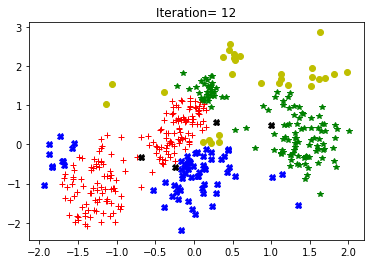

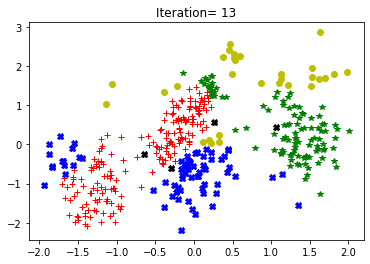

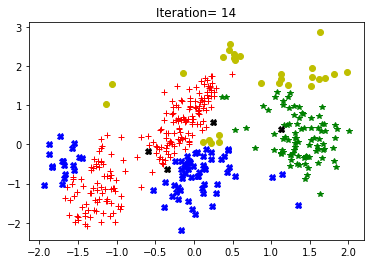

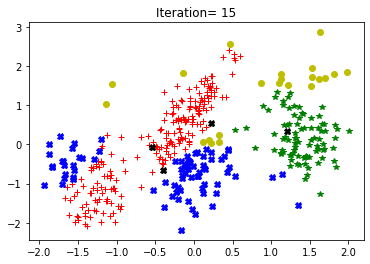

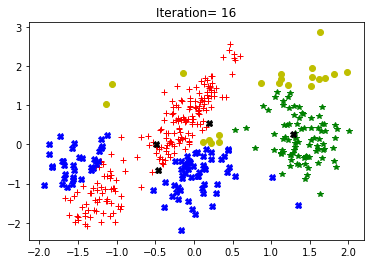

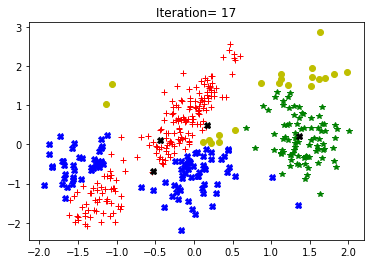

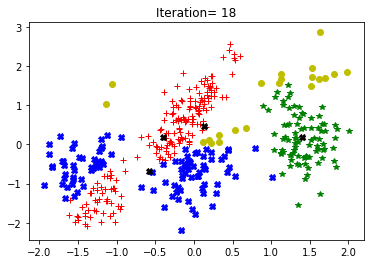

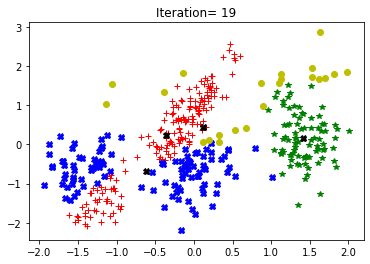

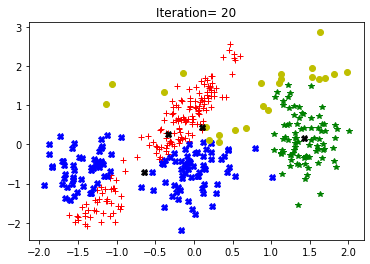

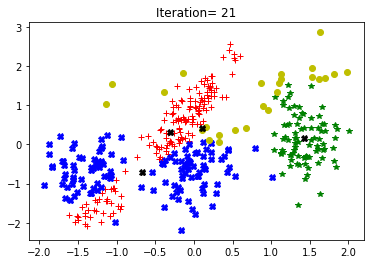

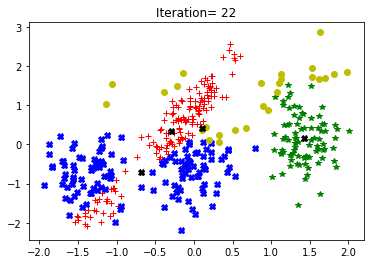

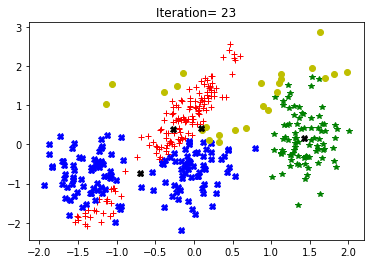

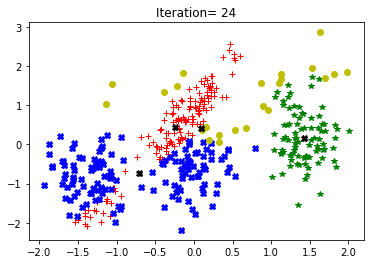

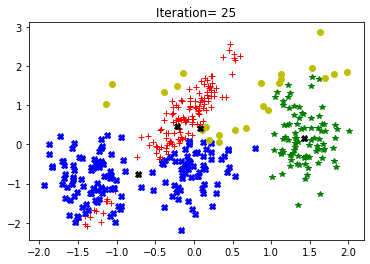

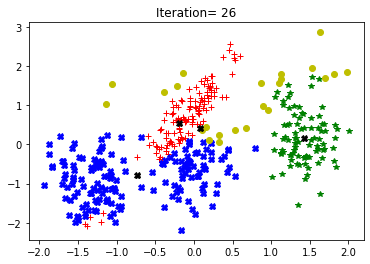

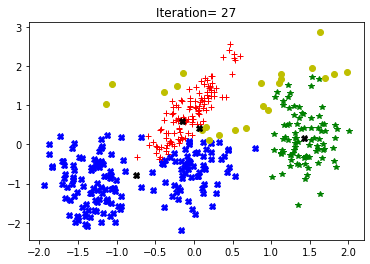

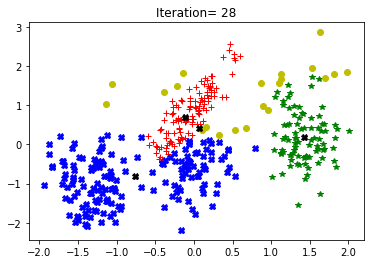

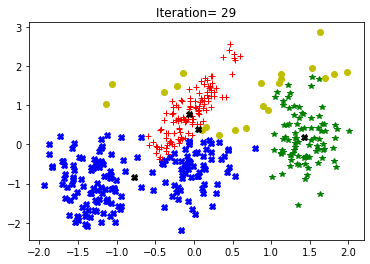

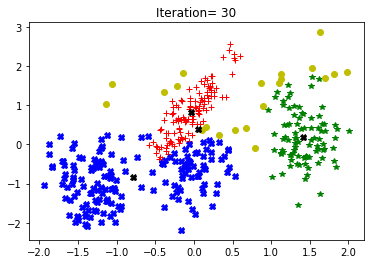

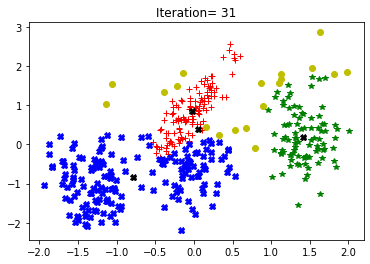

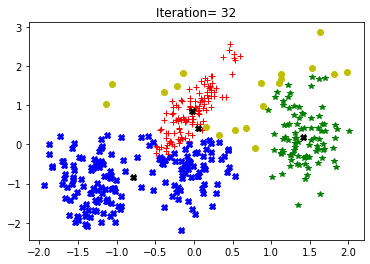

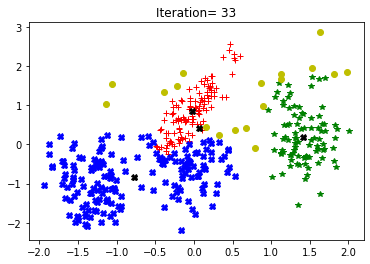

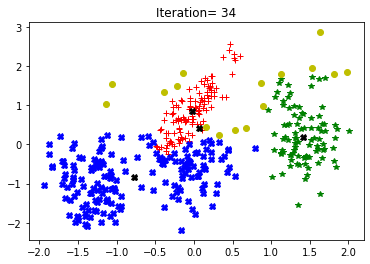

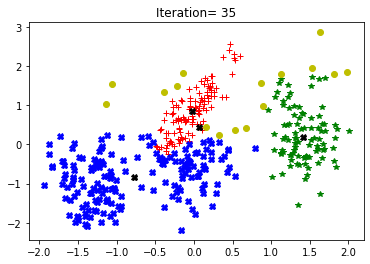

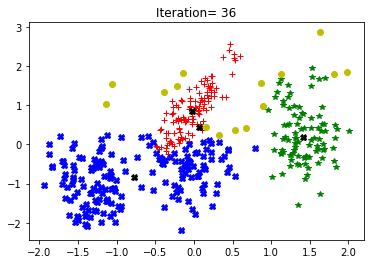

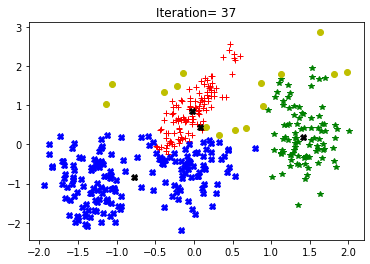

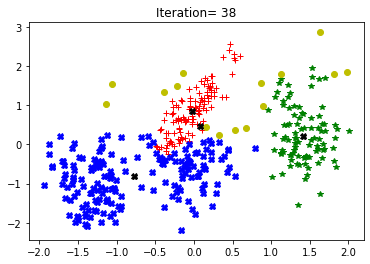

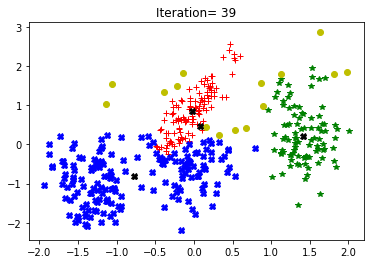

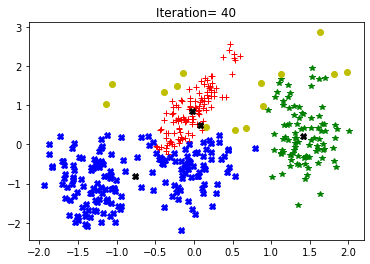

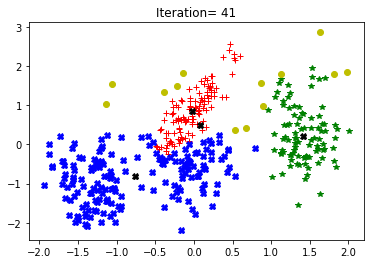

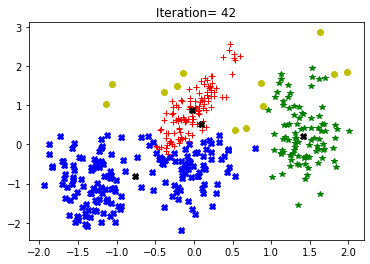

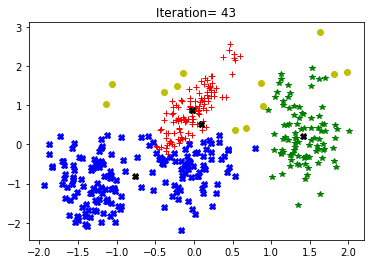

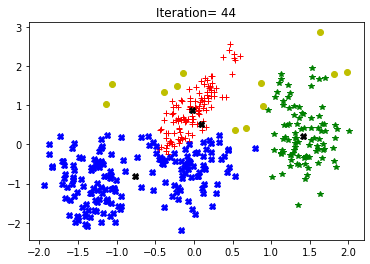

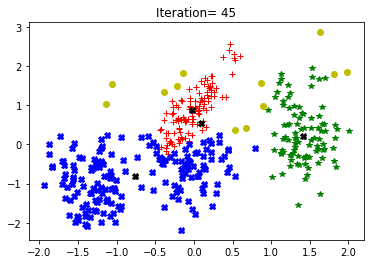

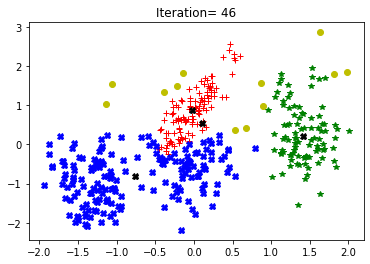

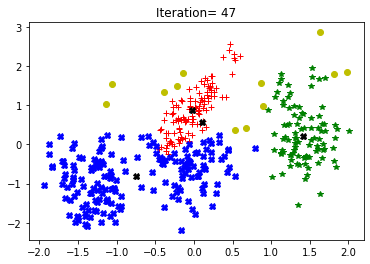

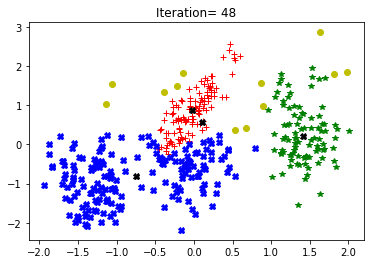

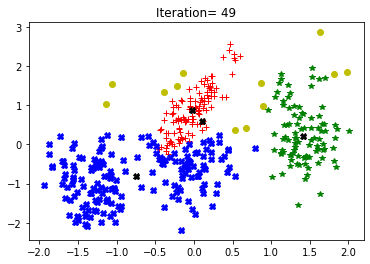

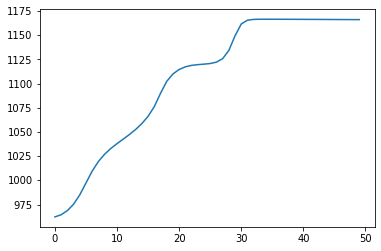

In [10]:
log_l=[]
Itr=50
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


K = 4   # no. of clusters

theta=initialization(data,K)

for n in range(Itr):

  responsibility=E_Step_GMM(data,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(data,responsibility)

  log_l.append(log_likhd)

  plt.figure()
  for l in range(K):
    id=np.where(cluster_label==l)
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
  Cents=theta[0].T
  plt.plot(Cents[:,0],Cents[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break


plt.figure()  
plt.plot(log_l)

**Step 6 : Calculate the accuracy**

In [11]:
# performance measure
# homogeneity: each cluster contains only members of a single class.
# referance: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

from sklearn import metrics

pred_lab=cluster_label
print(pred_lab)
print(lab)
print('performance=',metrics.homogeneity_score(pred_lab,lab))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 0 0 2 2 2 2 2 3 2 2 0 2 2 2 2
 0 2 2 0 2 2 2 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 3 2 0 2 2 0 2 2 2 2 2 2 2 2 0
 2 2 2 0 2 2 2 2 0 0 2 2 2 0 0 0 3 0 2 2 2 2 0 2 0 3 2 2 3 0 2 0 2 2 2 0 0
 2 2 2 0 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 3 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

In [17]:
## write your code here
import pandas as pd
data = pd.read_csv('/content/Iris.csv')
data[['target']] = data[['Species']].apply(lambda col:pd.Categorical(col).codes)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [18]:
x = np.asarray(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values.tolist())
y = (data[['Species']].apply(lambda col:pd.Categorical(col).codes)).values.tolist()
target = np.asarray([item for sublist in y for item in sublist])

print(x.shape)
print(target)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


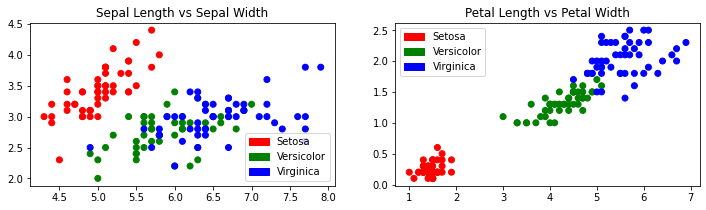

In [25]:
import matplotlib.patches as mpatches
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(['Setosa','Versicolor','Virginica'])
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')

plt.subplot(1, 2, 1)
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=colors[data['target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'], c= colors[data['target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [26]:
# k-means

def K_means_clustering(data,K,itr,eps):
  # random initialization of clusters
  idx=np.random.randint(0,data.shape[0],K)
  Cents=data[idx,:]


# initialized a array to store distance, assigned label, minimum distance
  DAL=np.zeros((data.shape[0],K+2))
  error=[]
  F=data+10**(-20)   # added a small value as it is a sparse matrix(many values are zero)
  


  for n in range(itr):
# assignment stage
   for i in range(F.shape[0]):
      for j in range(K):
        DAL[i,j]=np.linalg.norm(F[i,:]-Cents[j,:])
        

      Dist=np.min(DAL[i,:K])
      
      ind=((np.where(Dist==DAL[i,:K])[0]))
      
      DAL[i,K]=ind.astype('int')
      DAL[i,K+1]=Dist

# re-estimation stage
   for i in range(K):
      ind=np.where(DAL[:,K]==i)
      
      if (F[ind,:][0].shape[0])==0:
        id1=np.random.randint(0,data.shape[0],1)
        Cents[i,:]=F[id1,:]
      else:
        Cents[i,:]=np.mean(F[ind,:][0],axis=0)


      

   error.append(np.mean(DAL[:,K+1]))  
   #print(Cents)



   if n>2:
      if abs(error[n]-error[n-1])<eps:
         break

  #  print(n)
   
  return DAL, Cents,error


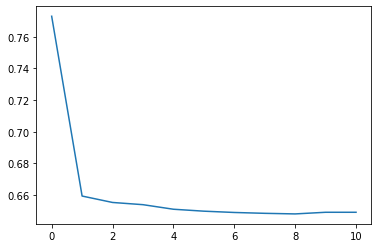

In [27]:
DAL,cents,error=K_means_clustering(x,3,200,10**(-20))
plt.figure()
plt.plot(error)

In [33]:

from sklearn import metrics

pred_lab=DAL[:,3]
print(pred_lab)
print(target)
print('performance=',metrics.homogeneity_score(pred_lab,target))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 1. 1. 2.
 1. 2. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 1.
 1. 1. 2. 1. 1. 2.]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
performance= 0.7474865805095324


In [34]:
import sklearn.metrics as sm

sm.confusion_matrix(pred_lab, target)

array([[50,  0,  0],
       [ 0,  3, 36],
       [ 0, 47, 14]])

In [30]:
# Sklearn K-means reference page: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,n_init=100,max_iter=100,verbose=1)
kmeans.fit(x)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 82.0112981965174
start iteration
done sorting
end inner loop
Iteration 1, inertia 79.6309054945055
start iteration
done sorting
end inner loop
Iteration 2, inertia 78.94084142614602
start iteration
done sorting
end inner loop
Iteration 3, inertia 78.94084142614602
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 84.14140042034468
start iteration
done sorting
end inner loop
Iteration 1, inertia 83.49417668308703
start iteration
done sorting
end inner loop
Iteration 2, inertia 82.07298129265357
start iteration
done sorting
end inner loop
Iteration 3, inertia 81.36720000000001
start iteration
done sorting
end inner loop
Iteration 4, inertia 80.315746215781
start iteration
done sorting
end inner loop
Iteration 5, inertia 79.68172190942472
start iteration
done sorting
end inner loop
Iteration 6, inertia 79.11

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=1)

In [31]:
# performance measure
# homogeneity: each cluster contains only members of a single class.
# referance: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

from sklearn import metrics

pred_lab=kmeans.predict(x)
print(pred_lab)
print(target)
print('performance=',metrics.homogeneity_score(pred_lab,target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
performance= 0.7649861514489815


In [32]:
import sklearn.metrics as sm

sm.confusion_matrix(pred_lab, target)

array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]])

In [35]:
dist_points_from_cluster_center = []
K = range(1,10)
for no_of_clusters in K:
  k_model = KMeans(n_clusters=no_of_clusters)
  k_model.fit(x)
  dist_points_from_cluster_center.append(k_model.inertia_)

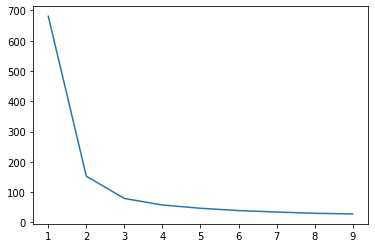

In [36]:
plt.plot(K, dist_points_from_cluster_center)

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

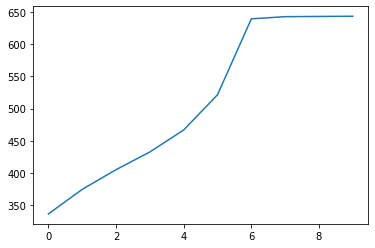

In [37]:
# write your code here
log_l=[]
Itr=10
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


K = 3  # no. of clusters

theta=initialization(x,K)

for n in range(Itr):

  responsibility=E_Step_GMM(x,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(x,responsibility)

  log_l.append(log_likhd)

  # if n>2:
  #   if abs(log_l[n]-log_l[n-1])<eps:
  #     break


plt.figure()  
plt.plot(log_l)

In [38]:
# performance measure
# homogeneity: each cluster contains only members of a single class.
# referance: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

from sklearn import metrics

pred_lab=cluster_label
print(pred_lab)
print(target)
print('performance=',metrics.homogeneity_score(pred_lab,target))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
performance= 0.6728846759701788


In [39]:
# GMM scikit (https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture.get_params)

from sklearn.mixture import GaussianMixture as Gmm
gmm=Gmm(n_components=3, init_params='kmeans',covariance_type='diag',verbose=1)

In [40]:
gmm.fit(x)

Initialization 0
Initialization converged: True


GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=1,
                verbose_interval=10, warm_start=False, weights_init=None)

In [41]:
gmm.get_params(deep=True)

{'covariance_type': 'diag',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 3,
 'n_init': 1,
 'precisions_init': None,
 'random_state': None,
 'reg_covar': 1e-06,
 'tol': 0.001,
 'verbose': 1,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [42]:
means=gmm.means_
vars=gmm.covariances_
weights=gmm.weights_

In [43]:
print(means.shape)
print(vars.shape)
print(weights.shape)

(3, 4)
(3, 4)
(3,)


In [46]:
# performance measure
# homogeneity: each cluster contains only members of a single class.
# referance: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

from sklearn import metrics

pred_lab=gmm.predict(x)
print(pred_lab)
print(target)
print('performance=',metrics.homogeneity_score(pred_lab,target))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
performance= 0.7859016861703575
